In [235]:
import pandas as pd

data_path = "data_preprocessed/3_word_removing.csv"
df = pd.read_csv(data_path)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157789 entries, 0 to 157788
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           157789 non-null  object
 1   text         157789 non-null  object
 2   label        157789 non-null  int64 
 3   text_length  157789 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 4.8+ MB


In [237]:
len_col_name = "text_length"

In [238]:
df[len_col_name].describe()

count    157789.000000
mean         15.167331
std          10.756140
min           4.000000
25%           8.000000
50%          12.000000
75%          19.000000
max         207.000000
Name: text_length, dtype: float64

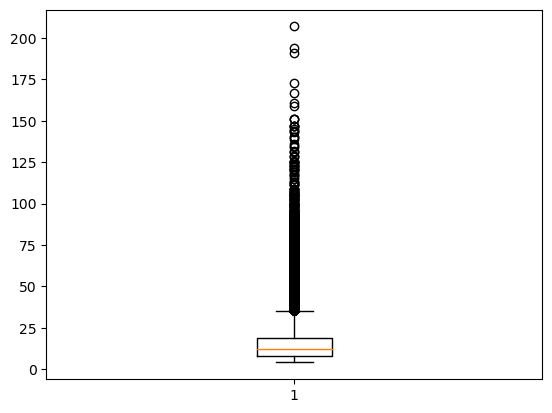

In [239]:
import matplotlib.pyplot as plt
# Plot and store the result
boxplot_result = plt.boxplot(df[len_col_name])

In [240]:
lower_bound = boxplot_result['whiskers'][0].get_ydata()[1]
upper_bound = boxplot_result['whiskers'][1].get_ydata()[1]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)


Lower Bound: 4.0
Upper Bound: 35.0


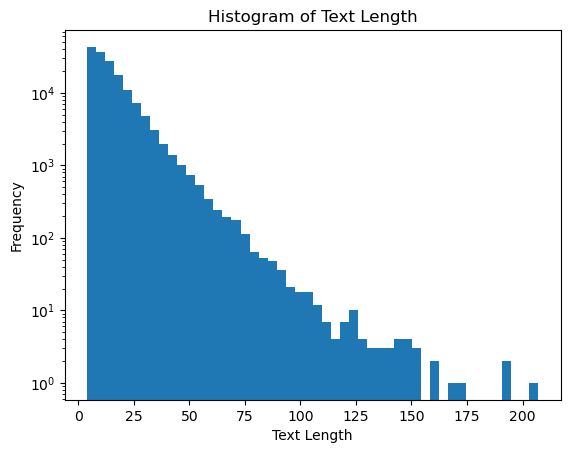

In [241]:
import matplotlib.pyplot as plt

plt.hist(df[len_col_name], bins=50, log=True)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.show()


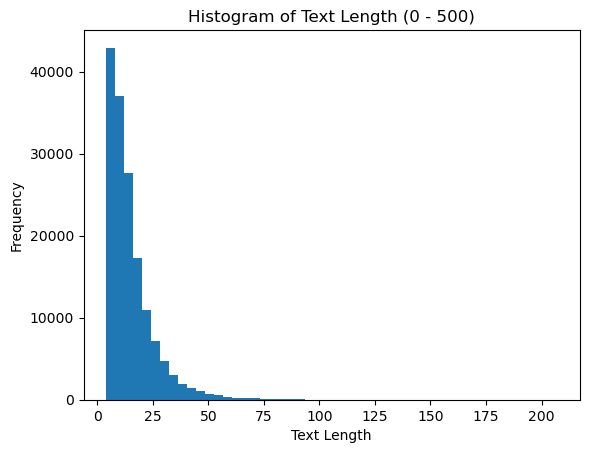

In [242]:
# Filter the DataFrame to include only rows where text_length is between 0 and 500
df_filtered = df[df[len_col_name] <= 500]

plt.hist(df_filtered[len_col_name], bins=50, log=False)  # Set log=False for a linear scale
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length (0 - 500)')
plt.show()

In [243]:
pd.set_option('display.max_colwidth', None)
df.sort_values(len_col_name, ascending=False).head(10)


,id,text,label,text_length
115125,de_0207416,tolles nützlich spielzeug gewiß bewertung woche monat schreiben häufig freude auspacken ausprobieren groß eher klein mangel ignorieren woche benutzen anderer käufer sicherlich sinnvoll tipp geben freuen bewertung mist kaufen letzter fehlend bringen artikel legen vorab wichtigste schicken bild garten kinderzimmer handy kind haus ändern spielen sicherheit weit wichtig rolle anderer kind besuch feier laut unübersichtlich helfen cam kind aufgehen genial akku steckdose notwendig akku halten minute reichen klein größe bildqualität absolut ausreichend einzeln einsatz fest installieren cam suchen falsch sicherlich variante gehäuse verarbeitung nicht hochwertig fokus liegen klar technik nicht design flecken macke scharf kante sehen nicht auseinander fallen wichtig produkt chemie stinken geben direkt auspacken wahrnehmbar geruch top maß sicht ausreichend angeben entsprechen erwartung gespannt akku dauerhaft überzeugen kapazität leiden gerne mal lauf lebenszeit akku laufzeit deutlich reduzieren bewertung entsprechend unten anpassen gelten anderer kunde defekt auftauchen anfang nicht preis lieferung verpackung artikel nicht schlecht bewerten versand verpackung problem stern fließen schlecht lieferung verpackung händler sicht einfluss eigentlich preis qualität okay geben verschieden alternative vergleich möglich anderer produkt testen kauf absolut zufrieden kabellos variante nicht kaufen geben schlicht verpacken gewohnt geschwindigkeit stehen paket werktag haustür bestens fazit preis qualität kaufempfehlung klein kabellos spielerei suchen mal schauen fall akku gut laufen zukünftig ändern bewertung wohnen problem nächster,3,207
85804,de_0911133,nutzung super produkt lieferumfang fest umschlag karton super schnell liefern ladekabel beschreibung lampe klein schachtel verpacken auspacken unangenehm geruch auffallen lampe auspacken gewünscht position biegen total leicht gehen lampe anschluss aufladen befinden mitte hinten lampe dick fläche versehen lampe nicht verrutschen edelstahl sehen hübsch gewicht gramm gering schulter hals bemerken verwendung benutzung einfach klein kind sofort machbar lassen einzeln schalten somit seite aussuchen gleichzeitig nutzen benutzen kabellos lampe nicht fallen weit weg nicht hell lampe rutschen weg minute neu justieren sehr gut gefällen lampe sehr schonend auge lampe nicht gesicht scheinen weg lesen entspannt sofa bett buch lesen verschieden licht lampe ding nutzen auto reparieren wandern direkt licht benötigen hand frei laut hersteller joggen geeignet nicht sicher wirklich sitzen bleiben bewegung nicht rutschen verschieden enorm benutzen lampe gerne lesen bett reichen stufe lieferung lampe laden komplett aufladung ungefähr stunde dauern stunde stufe nutzen akku stufe halten nicht ausprobieren sicherlich geben ähnlich lampe akkulaufzeit euro finden lampe ordnung verarbeitung haltbarkeit verarbeitung negativ sagen fest miteinander verbinden sehr stabil eindruck arm lassen super leicht biegen verbleiben stabil gewünscht position laut hersteller lampe erreichen ordnungsgemäß benutzung sicherlich sehr freude fazit persönlich total begeistert zufrieden somit gerne empfehlen,4,194
63615,de_0939026,top suche preiswert tablet entscheiden sehr zufrieden paket öffnen sehr überraschen verpackung preis nicht erwarten ähnlich gut produkt verpacken karton lediglich aufkleber bild tablet dennoch sehen sehr gut öffnen eindruck weiterhin sehr gut tablet schutzfolie einpacken tablet schutzfolie holen fallen tablet nochmal aufgeklebt schutzfolie display rückseite besitzen auspacken karton pluspunkt auffallen tablet sogar schutzfolie display mitliefern ladegerät mitliefern tablet gelegentlich lesen ebook surfen internet nutzen gebrauch fallen tablet diverser anderer ding nutzen lesen ebook auszeichnen hierfür app runter laden buch lesen funktionieren einwandfrei auflösung perfekt auflösung tablet preis auszeichnen starten tablet denken auflösung tablet mega schlecht foto sehr anderer sch

In [244]:
df[df[len_col_name] < 2].head()

,id,text,label,text_length


In [245]:
import sys
sys.path.append('../moduls')

from plot import frequent_words
# Word Frequency of most common words
frequent_words(df["text"])

:Bars   [index]   (Word frequency of most common words in comments)

In [246]:
df_bad_rated = df[df['label'].isin([0, 1])][['text', 'label']]
df_neutral_rated = df[df['label'].isin([2])][['text', 'label']]
df_good_rated = df[df['label'].isin([3, 4])][['text', 'label']]

In [247]:
# import display
from IPython.display import display

display(frequent_words(df_bad_rated["text"]))
display(frequent_words(df_neutral_rated["text"]))
display(frequent_words(df_good_rated["text"]))

:Bars   [index]   (Word frequency of most common words in comments)

:Bars   [index]   (Word frequency of most common words in comments)

:Bars   [index]   (Word frequency of most common words in comments)

In [248]:
data_preproc_path = "data_preprocessed/1_txt_cleaning.csv"
df_preproc = pd.read_csv(data_preproc_path)

In [249]:
df_merged = df.merge(df_preproc.drop(columns='label'), on='id')
df_merged.sample(10)

,id,text_x,label,text_length,text_y
95267,de_0827686,schlecht produkt wiederholt lieferant erneut kaufen bestellen jedenfalls sicherlich nicht verpackung fehlen gehen nicht bekommen display reinigen verarbeitung ansonsten gut sparen falsch stelle kunde unzufrieden schlecht rezension folge,0,28,"PreisLeistung schlecht!\n\nDieses Produkt habe ich wiederholt beim selbigen Lieferanten als ""erneut kaufen"" bestellt. Was ich jedenfalls sicherlich nicht noch einmal machen werde. Wie kann es denn sein, dass in der verschweissten Verpackung das ReinigungsSet fehlt? Das geht gar nicht! Wie bekommt man denn sonst das Display staubfrei gereinigt? Die Verarbeitung ist ja ansonsten ganz gut, aber da spart man an der falschen Stelle. Kunde unzufrieden und schlechte Rezension ist die Folge."
144903,de_0499916,verbessern finden sehr schade nicht app wiegen,1,7,"Man kann immer noch etwas verbessern\n\nFinde es sehr schade, dass man nicht auch ohne App wiegen kann"
9467,de_0052766,klein design sehen toll wind stellen schnell nicht,1,8,"Nichts für mich :\n\nEr ist klein und das Design sieht auch toll aus. Macht mir aber zu wenig Wind : Den kann man sich vielleicht auf den Esstisch stellen, damit die Suppe schneller kühler wird aber für mehr auch nicht."
4072,de_0257846,rate schön trotz wasser rand fliegen drinnen,2,7,Rate ab davon\n\nEigengebrauch schöner Gärtopf aber nach ein paar Tagen trotz Wasser im Rand waren fliegen drinnen und alles verdorben.
100114,de_0821974,sehr zufrieden lautstärke nicht betreiben raum laufen feuchtigkeit einschalten reduzieren ersetzen nicht gerne,3,13,":daumenhoch:\n\nIch bin sehr zufrieden mit dem Luftentfeuchter. Die Lautstärke ist ok, er muss ja nicht betrieben werden wenn man im Raum ist. Jetzt läuft er nurnoch jeden Tag und ich haben die Feuchtigkeit vonauf beim einschalten reduziert. Das Lueften ersetzt er nicht. Gerne wieder !"
14283,de_0883616,verbindung fernseher naja mal gucken anschließen streifen direkt fernseher punkt absolut fernseher deutlich günstig modell verbauen mindestens nicht preis finden traurig naja übel kaufen,2,24,Nur in Verbindung mit RGBVerbindern für Fernseher geeignet\n\nNaja mal gucken wenn sie angeschlossen ist Also ich habe die Streifen gerade auf gemacht und wollte diese natürlich auch direkt am Fernseher verbauen jetzt kommen wir zu dem Punkt was mich absolut ärgert Ich hatte hinter dem Fernseher schon deutlich günstigere Modelle an LEDStreifen verbaut und bei JEDEM waren immer mindestens Verbinder inklusive bei diesem allerdings nicht. Für den Preis finde ich es doch schon etwas traurig. Naja jetzt werde ich wohl oder übel noch Verbinder kaufen müssen.
82798,de_0730811,schrott folie nicht selbstklebend eher abraten,0,6,Schrott\n\nFolien sind nicht selbstklebend daher eher von abzuraten
105510,de_0077713,wackelig schwach platzsparend stabil nicht sehr schwach rad wackelig,1,9,"Etwas wackelig u schwach aber ist noch ok\n\nIst zwar Platzsparend aber besonders stabil nicht, sehr schwache Räder, wackelig"
74854,de_0242166,ersatzteil anfordern nicht erhalten gerät nicht dauereinsatz eignen,1,8,"Ersatzteile angefordert, nicht erhalten\n\nGerät ist nicht für einen Dauereinsatz geeignet."
55402,de_0188057,programm hängen box nicht zufrieden ruckelen gucken klappen nicht bild frieren netzstecker ziehen anbringen box neu starten lässt richtig bedienen genau box richten klein abweichung funktionieren nicht,2,27,Programme hängen oft.\n\nWar mit der Box nicht zufrieden . DAZN ruckelt und iptv gucken klappte nicht immer . Das Bild friert nach einiger Zeit ein und muss dann den Netzstecker ziehen und wieder anbringen um die Box neu zu starten . Die Fernedienung lässt sich nur dann richtig bedienen wenn sie genau auf die Box gerichtet ist . Eine kleine Abweichung mit der FB und sie funktioniert nicht .


In [250]:
words = set(df["text"].apply(lambda x: x.split()).explode())

In [251]:
# compute value counts for each word
word_counts = df["text"].apply(lambda x: x.split()).explode().value_counts()
word_counts

nicht          127792
gut             79672
sehr            71410
leider          43363
schön           21115
                ...  
klagen             39
teurer             39
schoen             39
laufmasche         39
nichtkaufen        38
Name: text, Length: 5000, dtype: int64

In [252]:
len(words)

5000